In [2]:
import requests
import urllib.request
import time
import string
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  

pd.set_option('display.max_rows', None)

In [3]:
# Tous les thés peuvent être trouvés sur ces 2 pages de produits (90 produits/page)
url_page_1 = 'https://camellia-sinensis.com/fr/thes/?types=nature&formats=vrac&name=asc&page_size=90&page=1'
url_page_2 = 'https://camellia-sinensis.com/fr/thes/?types=nature&formats=vrac&name=asc&page_size=90&page=2'

In [4]:
# On recupère les éléments html de la page grâce à Beautifulsoup
response1 = requests.get(url_page_1)
response2 = requests.get(url_page_2)

soup1 = BeautifulSoup(response1.text, 'html.parser')
soup2 = BeautifulSoup(response2.text, 'html.parser')

In [5]:
#On construit la liste d'adresses URL en scrapant chaque lien de produit sur les 2 pages
list_url = []
for a in soup1.find_all('a', class_= 'm-product-tile__link m-product-tile__link--image'):
    list_url.append(a['href'])
for a in soup2.find_all('a', class_= 'm-product-tile__link m-product-tile__link--image'):
    list_url.append(a['href'])

In [6]:
len(list_url)

144

In [7]:
liste = []
i=0
while i < len(list_url):
    liste.append(list_url[i])
    i+=1

longueur = len(liste)
print(longueur)

144


In [8]:
#Cette fonction va nous servir à "lire" chaque page produit pour récupérer les infos voulues
def getAndParseURL(url):
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    return(soup)

In [9]:
#On souhaite garder uniquement le thé en vrac dans notre liste. Pour cela, on récupère les indices de la liste contenant le mo boîte ou sac

k = 0
index = []
while k < len(liste):
    if 'boite' in liste[k]:
        index.append(k)
    if 'sac' in liste[k]:
        index.append(k)
    k+=1
print(index)
print(longueur)
        

[4, 5, 6, 11, 16, 25, 26, 54, 55, 56, 57, 59, 60, 61, 62, 63, 66, 77, 78, 79, 81, 104, 120, 136, 137, 138, 142]
144


In [10]:
# Une fois les indices connus, on supprime ces éléments de notre liste d'adresses en commençant par les indices les plus hauts.
# Ceci afin de ne pas décaler nos éléments.

l = 1
while l <len(index)+1:
    ind = index[-l]
    print(l)
    print(ind)
    del(liste[ind])
    l+=1

1
142
2
138
3
137
4
136
5
120
6
104
7
81
8
79
9
78
10
77
11
66
12
63
13
62
14
61
15
60
16
59
17
57
18
56
19
55
20
54
21
26
22
25
23
16
24
11
25
6
26
5
27
4


In [11]:
#Cette fonction récupère les infos du profil aromatique et garde uniquement les 6 caractéristiques voulues.
def profil(resultat):
    aromas = []
    aroma_str = str(resultat)

    aroma_list = aroma_str.splitlines()
#    print(len(aroma_list))
#    print(aroma_list)
    del aroma_list[0], aroma_list[-1]

    aromas = aroma_list

    j=0
    while j < 6:
#        print(aromas[j])
        aromas[j] = aromas[j][-9]
        j+=1
#    print(len(aroma_list))
    return aromas


In [12]:
# Informations générales
nom = []
variete = []
pays = []
temperature = []

# Profil d'arômes

floral = []
fruite = []
boise = []
terreux = []
epice = []
vegetal = []

# Liste vide pour comparer
vide = []

In [13]:
# En passant par toutes les adresses URL, on récupère les informations de chaque thé

i = 0
aRemplir = 'A remplir'

for url in liste:
    soup = getAndParseURL(url)
    
    # Noms du thé
    nom.append(soup.find('h1', class_= 'product-details__name').string)
    
    #Pays et type de thé
    
    # Récupère le pays et la variété ("couleur") du thé si disponible.
    genre = soup.find_all('span', class_= 'colored-label')
    if len(genre) < 2:
        variete.append(aRemplir)
        pays.append(aRemplir)
        print('OOO Ajouter manuellement les infos de ce thé OOO')
    else:
        variete.append(genre[0].string)
        pays.append(genre[1].string)
    #Récupère la température d'infusion
    prep = soup.find_all('span', class_= 'product-prep__content-row-value')
    if len(prep)>0:
        temperature.append(prep[1].string)
    elif len(prep)==0:
            temperature.append(aRemplir)
    # Récupère le profil aromatique du thé
    aroms = soup.find_all('div', class_= 'product-attributes__aroma-wrapper')
    if aroms != vide:
        aroma = profil(aroms)
        floral.append(aroma[0])
        fruite.append(aroma[1])
        boise.append(aroma[2])
        terreux.append(aroma[3])
        epice.append(aroma[4])
        vegetal.append(aroma[5])
    else:
        floral.append(aRemplir)
        fruite.append(aRemplir)
        boise.append(aRemplir)
        terreux.append(aRemplir)
        epice.append(aRemplir)
        vegetal.append(aRemplir)        
    print(nom[i], variete[i], pays[i], temperature[i], floral[i], fruite[i], boise[i], terreux[i], epice[i], vegetal[i])
    i+=1
    # Ce délai permet de ne pas surcharger le serveur et de ne pas être bloqué.
    time.sleep(1)

Ali Shan 1999 (Cuisson charbon) Thé wulong Taiwan 
                                                                    95
                                                             0 0 3 1 1 0
Anxi Tie Guan Yin Thé wulong Chine 
                                                                    95
                                                             3 0 1 0 0 2
Bai Hao Thé wulong Taiwan 
                                                                    90
                                                             1 1 3 0 1 0
Bai Hao 2008 Thé wulong Taiwan 
                                                                    95
                                                             0 2 2 0 1 0
Bai Hao Jingmai biologique Thé wulong Chine 
                                                                    95
                                                             0 3 2 0 0 0
Bai Hao Yin Zhen Thé blanc Chine 
                                                       

Kenya Kangaita Thé noir Kenya 
                                                                    95
                                                             1 1 2 0 0 0
Kukicha biologique Thé vert Japon 
                                                                    80
                                                             0 1 2 0 0 2
La Cumbre Bitaco biologique Thé noir Colombie 
                                                                    95
                                                             0 1 3 0 1 0
Laos Pu Er Sheng 2018 Phong Sali Thé pu er et vieilli Laos 
                                                                    95
                                                             1 2 1 0 0 2
Lapsang Souchong biologique Thé noir Chine 
                                                                    95
                                                             0 0 3 1 0 0
Lingtou Yuan Wei Dancong Thé wulong Chine 
                    

Pu Er Shou 2008 Jingmai biologique Thé pu er et vieilli Chine 
                                                                    95
                                                             0 1 2 3 0 0
Pu Er Shou 2008 Yellow Label 7572 Thé pu er et vieilli Chine A remplir 0 1 0 3 1 0
Pu Er Shou 2011 Bulang Shan mini tuocha Thé pu er et vieilli Chine 
                                                                    95
                                                             0 1 1 3 0 0
Pu Er Shou 2011 Menghai Sheng Tai Tuo Cha Thé pu er et vieilli Chine 
                                                                    95
                                                             0 0 2 3 0 0
Pu Er Shou 2018 Yongde Thé pu er et vieilli Chine 
                                                                    95
                                                             0 0 2 3 0 0
Qi Lan Xiang Thé wulong Chine 
                                                          

In [14]:
#Vérification de la longueur de chaque liste
print(len(nom))
print(len(variete))
print(len(pays))
print(len(temperature))
print(len(floral))
print(len(fruite))
print(len(boise))
print(len(terreux))
print(len(epice))
print(len(vegetal))
print(len(liste))

117
117
117
117
117
117
117
117
117
117
117


In [15]:
#Crée le dataframe pandas avec les listes
df = pd.DataFrame({'nom' : nom, 'variete' : variete, 'pays' : pays, 'temperature' : temperature, 'floral' : floral, 'fruite':fruite, 'boise':boise, 'terreux':terreux, 'epice':epice, 'vegetal':vegetal, 'url':liste})


In [16]:

cols = list(df.columns.values)
print(cols)

['nom', 'variete', 'pays', 'temperature', 'floral', 'fruite', 'boise', 'terreux', 'epice', 'vegetal', 'url']


In [17]:
#On retire les espaces superflus de la valeur "temperature"
df['temperature']= df['temperature'].str.strip()

In [72]:
# On sauve le dataframe dans un fichier csv
export_csv = df.to_csv(r'df.csv', index=None, header=True)

In [19]:
# Pour réouvrir le fichier csv dans un dataframe
#df =  pd.read_csv('scraped_data.csv', encoding='latin-1')


In [20]:
# Il faut maintenant vérifier que les données soient complètes
# Si non, remplir les valeurs manquantes
np.where(df['variete']=='A remplir')

(array([], dtype=int32),)

In [21]:
# On cherche les thés dont le profil d'arôme n'est pas connu
arome_vide = np.where(df['floral']=='A remplir')
arome_vide[0][1]

83

In [22]:
df.loc[arome_vide[0][0]]['url']

'https://camellia-sinensis.com/fr/matcha-sora/2311'

In [23]:
#En comparant la description du matcha sora avec les trois autres matcha, j'ai décidé du profil d'arome suivant : 0 0 0 0 0 3
#La description ne parle que du côté végétal contrairement aux autres thés.
df.loc[arome_vide[0][0]]['floral']=0
df.loc[arome_vide[0][0]]['fruite']=0
df.loc[arome_vide[0][0]]['boise']=0
df.loc[arome_vide[0][0]]['terreux']=0
df.loc[arome_vide[0][0]]['epice']=0
df.loc[arome_vide[0][0]]['vegetal']=3

In [24]:
df.loc[arome_vide[0][1]]['url']

'https://camellia-sinensis.com/fr/pu-er-sheng-2019-yongde-da-shan-vieux-theiers/5824'

In [25]:
#Pour le pu er yongde da shan, vieux théiers, j'ai décidé de ne pas le garder dans la liste. Beaucoups de pu er sont déjà présents
#et je ne m'y connais pas assez dans ce type de thé pour extrapoler les profils des autres pu ers.
df = df.drop([arome_vide[0][1]], axis=0)

In [26]:
np.where(df['floral']=='A remplir')

(array([], dtype=int32),)

In [27]:
temp_vide = df[df['temperature']=='A remplir'].index.tolist()

In [28]:
temp_vide[0]

82

In [29]:
df.at[temp_vide[2],'temperature']

'A remplir'

In [30]:
#Tous les thés Pu Er semblent être infusés à 95 degrés C.
df.at[temp_vide[0],'temperature'] = 95
df.at[temp_vide[1],'temperature'] = 95
df.at[temp_vide[2],'temperature'] = 95

In [31]:
#On veut maintenant changer le type de nos variables 
df.dtypes

nom            object
variete        object
pays           object
temperature    object
floral         object
fruite         object
boise          object
terreux        object
epice          object
vegetal        object
url            object
dtype: object

In [32]:
#La température et les arômes sont des integer
df.temperature = df.temperature.astype(np.int64)
df.floral = df.floral.apply(np.int64)
df.fruite = df.fruite.apply(np.int64)
df.boise = df.boise.apply(np.int64)
df.terreux = df.terreux.apply(np.int64)
df.epice = df.epice.apply(np.int64)
df.vegetal = df.vegetal.apply(np.int64)


In [35]:
# On exporte le dataframe nettoyé
export_csv = df.to_csv(r'cleaned_data.csv', index=None, header=True)

In [36]:
#On importe les données dans un nouveau dataframe pour l'analyse
data =  pd.read_csv('cleaned_data.csv', encoding = 'utf-8')

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [38]:
#Importation des algorithmes dont nous aurons besoin pour classifier les thés
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

In [39]:
#Nous allons grouper les différents thés par rapport à leur profil d'arôme
pro = data[['floral', 'fruite', 'boise', 'terreux', 'epice', 'vegetal']]

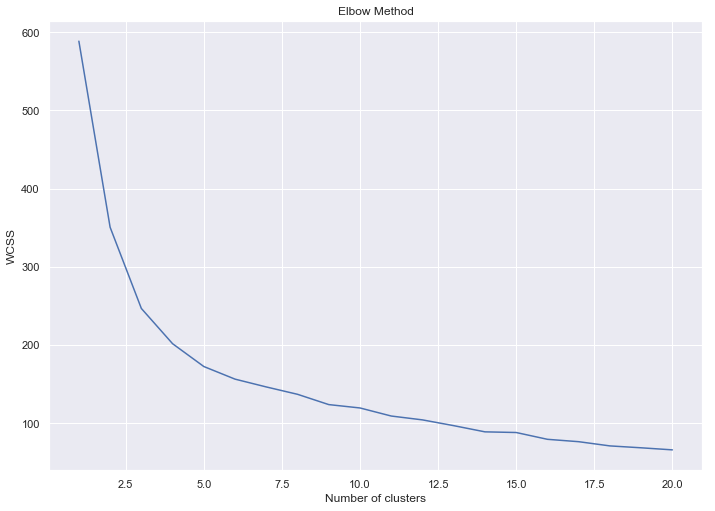

In [40]:
#En regardant les données, on peut savoir en combien de clusters l'ensemble se divise le mieux.
#Pour cela, on utilise la méthode du coude (elbow method) ou le nombre optimal de clusters se situe à l'endroit ou l'inertie 
# selon le nombre de groupe forme un coude.
wcss = []

for i in range(1,21):
    kmeans = KMeans( n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pro)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
#5 clusters

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pro)

#6 clusters
kmeans6 = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y6 = kmeans6.fit_predict(pro)

#Spectral clustering
spectre = SpectralClustering(n_clusters=5, n_init=10)
pred_y_spectr = spectre.fit_predict(pro)

In [42]:
# On rajoute a nos données les groupements faits
data['cluster'] = pred_y 
data['cluster6'] = pred_y6 
data['spectral'] = pred_y_spectr

In [43]:
data

,nom,variete,pays,temperature,floral,fruite,boise,terreux,epice,vegetal,url,cluster,cluster6,spectral
0,Ali Shan 1999 (Cuisson charbon),Thé wulong,Taiwan,95,0,0,3,1,1,0,https://camellia-sinensis.com/fr/ali-shan-1999...,4,5,0
1,Anxi Tie Guan Yin,Thé wulong,Chine,95,3,0,1,0,0,2,https://camellia-sinensis.com/fr/anxi-tie-guan...,3,3,0
2,Bai Hao,Thé wulong,Taiwan,90,1,1,3,0,1,0,https://camellia-sinensis.com/fr/bai-hao/2779,4,5,0
3,Bai Hao 2008,Thé wulong,Taiwan,95,0,2,2,0,1,0,https://camellia-sinensis.com/fr/bai-hao-2008/...,2,2,2
4,Bai Hao Jingmai biologique,Thé wulong,Chine,95,0,3,2,0,0,0,https://camellia-sinensis.com/fr/bai-hao-jingm...,2,2,0
5,Bai Hao Yin Zhen,Thé blanc,Chine,75,1,0,1,0,0,1,https://camellia-sinensis.com/fr/bai-hao-yin-z...,3,3,4
6,Bai Mu Dan Wang,Thé blanc,Chine,75,1,0,1,0,0,2,https://camellia-sinensis.com/fr/bai-mu-dan-wa...,3,3,4
7,Bancha Shizuoka,Thé vert,Japon,85,0,0,1,0,0,3,https://camellia-sinensis.com/fr/bancha-shizuo...,0,4,1
8,Ceylan New Vithanakande,Thé noir,Sri Lanka,95,0,1,3,0,0,0,https://camellia-sinensis.com/fr/ceylan-new-vi...,4,5,2
9,Da Hong Pao 1994,Thé wulong,Chine,95,0,1,3,0,0,0,https://camellia-sinensis.com/fr/da-hong-pao-1...,4,5,2


In [44]:
#On classe les thés par appartenance à un cluster. On remarque déjà quelques caractéristiques en lisant le tableau
#Les Puer sont presque tous groupés dans le même cluster et les thés verts japonais dans un autre.

varitest = data[['nom','variete','pays', 'cluster','cluster6','spectral', 'url','floral', 'fruite', 'boise', 'terreux', 'epice', 'vegetal']]
display(varitest.sort_values('cluster'))

,nom,variete,pays,cluster,cluster6,spectral,url,floral,fruite,boise,terreux,epice,vegetal
57,Matcha Fuka Midori,Thé vert,Japon,0,4,1,https://camellia-sinensis.com/fr/matcha-fuka-m...,0,1,0,0,0,3
97,Sencha Ashikubo biologique,Thé vert,Japon,0,4,1,https://camellia-sinensis.com/fr/sencha-ashiku...,0,1,1,0,0,3
59,Matcha Sora,Thé vert,Japon,0,4,1,https://camellia-sinensis.com/fr/matcha-sora/2311,0,0,0,0,0,3
58,Matcha Sendo,Thé vert,Japon,0,4,1,https://camellia-sinensis.com/fr/matcha-sendo/...,0,0,1,0,0,3
56,Matcha Choan,Thé vert,Japon,0,3,1,https://camellia-sinensis.com/fr/matcha-choan/...,1,1,0,0,0,3
55,Lu An Gua Pian,Thé vert,Chine,0,4,1,https://camellia-sinensis.com/fr/lu-an-gua-pia...,0,1,1,0,0,3
48,Laos Pu Er Sheng 2018 Phong Sali,Thé pu er et vieilli,Laos,0,1,4,https://camellia-sinensis.com/fr/laos-pu-er-sh...,1,2,1,0,0,2
100,Sencha Nagashima biologique,Thé vert,Japon,0,4,1,https://camellia-sinensis.com/fr/sencha-nagash...,0,1,0,0,0,3
43,Kabusecha Takamado,Thé vert,Japon,0,4,1,https://camellia-sinensis.com/fr/kabusecha-tak...,0,1,0,0,0,2
33,Gyokuro Tamahomare,Thé vert,Japon,0,4,1,https://camellia-sinensis.com/fr/gyokuro-tamah...,0,2,0,0,0,3


In [45]:
# Les couleurs choisies pour les thés sont celles du site internet.
color = ["#63CABA", "#886479", "#A5BACA", "#ABC37D", "#005970", "#D6223D"]

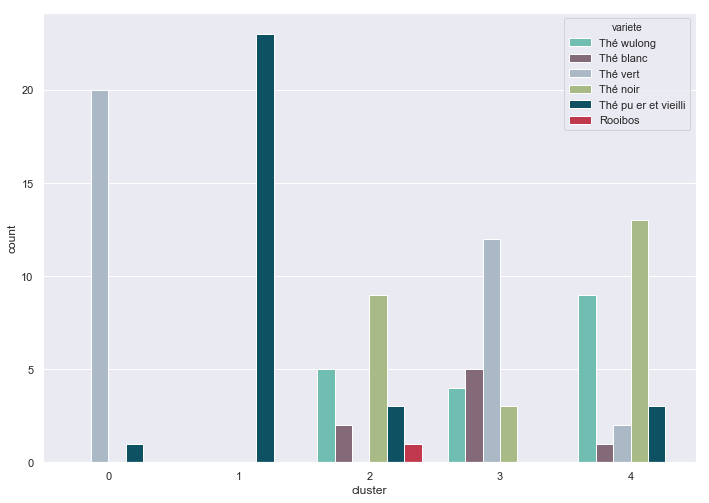

In [46]:
#On trace le nombre de thés de chaque variété pour chaque cluster
ax = sns.countplot(x="cluster", hue='variete', data=varitest, palette = color)

In [47]:
#On voit bien que les clusters 0 et 2 (peuvent changer lorsque l'on relance le code) sont composés uniquement d'un seul type de thé (puer et thé vert)
#Les thés blancs sont surtout regroupés dans le cluster 3 et les wulong dans le 1 mais c'est moins flagrant.

In [48]:
#Afin de voir s'il existe une explication pour les autres clusters, j'ai décidé d'analyser l'intensité des arômes présents dans un cluster.
#Pour cela, on somme la valeur de chaque arôme pour un cluster donné et on divise par le nombre de thés présents dans le cluster.

#Intensité des arômes pour chaque cluster
floral0 = varitest.query("cluster == 0")['floral'].sum()
fruite0 = varitest.query("cluster == 0")['fruite'].sum()
boise0 = varitest.query("cluster == 0")['boise'].sum()
terreux0 = varitest.query("cluster == 0")['terreux'].sum()
epice0 = varitest.query("cluster == 0")['epice'].sum()
vegetal0 = varitest.query("cluster == 0")['vegetal'].sum()

n_cluster0 = len(varitest[varitest['cluster']==1])

print(n_cluster0)



23


In [49]:
#Afin de voir s'il existe une explication pour les autres clusters, j'ai décidé d'analyser l'intensité des arômes présents dans un cluster.
#Pour cela, on somme la valeur de chaque arôme pour un cluster donné et on divise par le nombre de thés présents dans le cluster.

#Initialisation des listes
arom_flora =  []
arom_fruit =  []
arom_bois =  []
arom_terre =  []
arom_epice =  []
arom_vege =  []

#Pour chaque cluster, on fais la moyenne des valeurs d'arômes des thés.
i = 0
while i<5:
    arom_flora.append(varitest[varitest['cluster']==i]['floral'].sum()/len(varitest[varitest['cluster']==i]))
    arom_fruit.append(varitest[varitest['cluster']==i]['fruite'].sum()/len(varitest[varitest['cluster']==i]))
    arom_bois.append(varitest[varitest['cluster']==i]['boise'].sum()/len(varitest[varitest['cluster']==i]))
    arom_terre.append(varitest[varitest['cluster']==i]['terreux'].sum()/len(varitest[varitest['cluster']==i]))
    arom_epice.append(varitest[varitest['cluster']==i]['epice'].sum()/len(varitest[varitest['cluster']==i]))
    arom_vege.append(varitest[varitest['cluster']==i]['vegetal'].sum()/len(varitest[varitest['cluster']==i]))
    i+=1



In [50]:
arom_cluster = [1,2,3,4,5]
clusters = [0,1,2,3,4]
i=0
while i<5:
    arom_cluster[i] = [arom_flora[i], arom_fruit[i], arom_bois[i],arom_terre[i], arom_epice[i], arom_vege[i]]
#    arom_cluster.append(arom_flora[i], arom_fruit[i])
    i+=1


In [51]:
dicts = {}
keys = range(5)
for i in keys:
    dicts[i] = arom_cluster[i]

In [52]:
aromas = pd.DataFrame(dicts)

In [53]:
aromasT=aromas.transpose()
aromasT.columns = ['floral','fruite','boise','terreux','epice','vegetal']
aromasT

,floral,fruite,boise,terreux,epice,vegetal
0,0.142857,0.857143,0.619048,0.047619,0.000000,2.761905
1,0.000000,0.869565,1.304348,2.652174,0.304348,0.086957
2,0.550000,2.250000,1.450000,0.300000,0.200000,0.300000
3,1.583333,0.458333,0.500000,0.000000,0.000000,2.166667
4,0.285714,0.678571,2.607143,0.285714,0.428571,0.214286


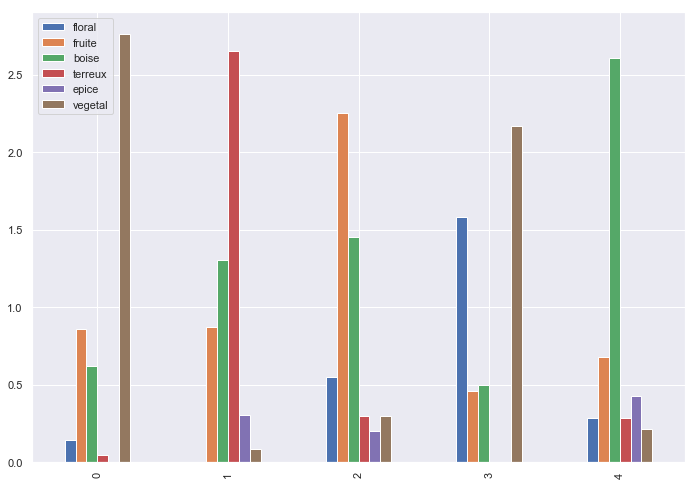

In [54]:
aromasT.plot(kind='bar')

In [55]:
alldistances = kmeans.fit_transform(pro)

In [56]:
cluster_distance = []
i=0
while i < len(alldistances):
    cluster_distance.append(min(alldistances[i]))
    i+=1
print(cluster_distance)

[1.256615148982798, 1.5794909517520719, 1.105413395753012, 1.2196310917650464, 1.1779218989389744, 1.4701898970314455, 0.9100137361600648, 0.9793792286287208, 0.8065421279025865, 0.8065421279025865, 1.0038192373253711, 1.2566151489827992, 1.441570324333849, 1.441570324333849, 2.321098877687032, 2.321098877687032, 1.2196310917650464, 0.8874119674649432, 1.3655753067360838, 1.1880481191152714, 0.8630131323836655, 1.3914828384841549, 1.8147637165589283, 0.9420721840708383, 1.6639433533005858, 1.0897247358851685, 1.177921898938976, 1.6495721976846454, 1.2177820811947069, 1.3652639225553767, 1.2226167292601007, 1.2226167292601007, 1.3299276232160886, 1.3299276232160886, 1.2566151489827992, 0.8065421279025865, 0.9100137361600648, 2.0720442434800406, 0.954703269782467, 1.441570324333849, 1.1372630948636187, 0.9420721840708383, 1.1880481191152714, 1.0033955955097849, 1.2226167292601007, 1.1372630948636187, 1.5907898179514348, 0.8907117080957084, 1.6639433533005858, 1.1984258382544648, 1.042832

In [57]:
min(alldistances[1])

1.5794909517520719

In [58]:
data['distances']= cluster_distance

In [59]:
data

,nom,variete,pays,temperature,floral,fruite,boise,terreux,epice,vegetal,url,cluster,cluster6,spectral,distances
0,Ali Shan 1999 (Cuisson charbon),Thé wulong,Taiwan,95,0,0,3,1,1,0,https://camellia-sinensis.com/fr/ali-shan-1999...,4,5,0,1.256615
1,Anxi Tie Guan Yin,Thé wulong,Chine,95,3,0,1,0,0,2,https://camellia-sinensis.com/fr/anxi-tie-guan...,3,3,0,1.579491
2,Bai Hao,Thé wulong,Taiwan,90,1,1,3,0,1,0,https://camellia-sinensis.com/fr/bai-hao/2779,4,5,0,1.105413
3,Bai Hao 2008,Thé wulong,Taiwan,95,0,2,2,0,1,0,https://camellia-sinensis.com/fr/bai-hao-2008/...,2,2,2,1.219631
4,Bai Hao Jingmai biologique,Thé wulong,Chine,95,0,3,2,0,0,0,https://camellia-sinensis.com/fr/bai-hao-jingm...,2,2,0,1.177922
5,Bai Hao Yin Zhen,Thé blanc,Chine,75,1,0,1,0,0,1,https://camellia-sinensis.com/fr/bai-hao-yin-z...,3,3,4,1.470190
6,Bai Mu Dan Wang,Thé blanc,Chine,75,1,0,1,0,0,2,https://camellia-sinensis.com/fr/bai-mu-dan-wa...,3,3,4,0.910014
7,Bancha Shizuoka,Thé vert,Japon,85,0,0,1,0,0,3,https://camellia-sinensis.com/fr/bancha-shizuo...,0,4,1,0.979379
8,Ceylan New Vithanakande,Thé noir,Sri Lanka,95,0,1,3,0,0,0,https://camellia-sinensis.com/fr/ceylan-new-vi...,4,5,2,0.806542
9,Da Hong Pao 1994,Thé wulong,Chine,95,0,1,3,0,0,0,https://camellia-sinensis.com/fr/da-hong-pao-1...,4,5,2,0.806542


In [60]:
input_the = 'Darjeeling Avongrove biologique'

In [61]:
#dSquared = scipy.spatial.distance.cdist(data.iloc[:,4:10], temp_df.iloc[:,4:10], metric='euclidean')

In [62]:
#list_dist = dSquared.tolist()
#sorted(list_dist)

In [63]:
#data.iloc[:,4:10]
#temp_df.iloc[:,4:10]

In [64]:
#data.loc[data['nom']==input_the]
#cluster_the = data.loc[data['cluster']==]
#temp_df = data.loc[data['nom']==input_the]
#cluster_the = temp_df.cluster.values[0]
#new_df = data.loc[data['cluster']==cluster_the].copy()
#new_df
#distance_sameC = scipy.spatial.distance.cdist(new_df.iloc[:,4:10], temp_df.iloc[:,4:10], metric='euclidean')
#dist_clust = distance_sameC.tolist()
#new_df['distance'] = dist_clust
#new_df.sort_values(['distance'])[1:6]


In [67]:
def recommendTea(input_string):
    input_tea = data.loc[data['nom']==input_string]
    cluster_the = input_tea.cluster.values[0]
    new_df = data.loc[data['cluster']==cluster_the].copy()
    distance_sameC = scipy.spatial.distance.cdist(new_df.iloc[:,4:10], input_tea.iloc[:,4:10], metric='euclidean')
    dist_clust = distance_sameC.tolist()
    new_df['distance'] = dist_clust
    result = new_df.sort_values(['distance'])[1:6].copy()
    resultat = result[['nom','variete','pays']]
    print('Les thés recommandés pour vous sont : ')
    return resultat
    
    

In [68]:
recommendTea(input_the)

Les thés recommandés pour vous sont : 


,nom,variete,pays
45,Kenya Kangaita,Thé noir,Kenya
71,Pu Er Sheng 1996 Menghai,Thé pu er et vieilli,Chine
40,Jin Die biologique,Thé noir,Chine
115,Yunnan Da Ye biologique,Thé noir,Chine
11,Darjeeling 1st flush Jungpana biologique,Thé noir,Inde


In [69]:
rooibos = 'Rooibos Wupperthal biologique'
recommendTea(rooibos)

Les thés recommandés pour vous sont : 


,nom,variete,pays
41,Jin Hou biologique,Thé noir,Chine
82,Pu Er Sheng 2016 Mengsong,Thé pu er et vieilli,Chine
23,Du Yun Hong Cha,Thé noir,Chine
51,Liu Bao Shi Shan Gu Shu 2016 (théiers de 100 ans),Thé pu er et vieilli,Chine
108,Tea Studio | Nilgiri Coonoor,Thé noir,Inde


In [70]:
ceylan = 'Ceylan New Vithanakande'
recommendTea(ceylan)

Les thés recommandés pour vous sont : 


,nom,variete,pays
8,Ceylan New Vithanakande,Thé noir,Sri Lanka
9,Da Hong Pao 1994,Thé wulong,Chine
96,Rwanda Rukeri biologique,Thé noir,Rwanda
35,Hong Xiang Luo,Thé noir,Chine
63,Nadeshiko biologique,Thé noir,Japon
